In [1]:
import pandas as pd
import pandas as pd
import string
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

C:\Users\7MAKSACOD PC\miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [28]:
names=pd.read_csv(f"/Users/7MAKSACOD PC/Downloads/names_data.csv")

In [29]:
names.tail()

,name,gender,num_names
35556,Fatim,F,26
35557,Fibi,M,25
35558,Fatima,F,8
35559,Fatoumata,F,56
35560,Kadi,F,87


In [34]:
alphabet=list(string.ascii_lowercase)
alphabet=alphabet+[" "]

In [43]:
names["name"]=names["name"].str.lower()
data=names.iloc[:, :2]

## Binary encoder function

def encod_sex(ch):
  if ch=="F":
    return 0
## 0 mean female and 1 for male
  else:
    return 1

data["gender"]= data["gender"].apply(encod_sex)

In [44]:
data.tail()

,name,gender
35556,fatim,0
35557,fibi,1
35558,fatima,0
35559,fatoumata,0
35560,kadi,0


In [26]:
data.iloc[35555, :]

name      fanta 
gender         0
Name: 35555, dtype: object

## 

In [45]:
def encod_names(name):
    name_split=list(name)
    name_encoded=[alphabet.index(name_split[i])+1 for i in range(len(name_split))]
    return name_encoded

data["name_encoded"]=data["name"].apply(encod_names)

In [46]:
data.head()

,name,gender,name_encoded
0,mary,0,"[13, 1, 18, 25]"
1,annie,0,"[1, 14, 14, 9, 5]"
2,anna,0,"[1, 14, 14, 1]"
3,margaret,0,"[13, 1, 18, 7, 1, 18, 5, 20]"
4,helen,0,"[8, 5, 12, 5, 14]"


In [47]:
def comp_list(x):
    if len(x)< 50:
        x=[0]*(50-len(x))+x
    return x

In [48]:
data["name_encoded"]=data["name_encoded"].apply(comp_list)

In [49]:
data.head()

,name,gender,name_encoded
0,mary,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,annie,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,anna,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,margaret,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,helen,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [53]:
def lstm_model(num_alphabets=28, name_length=50, embedding_dim=256):
    model = Sequential([
        Embedding(num_alphabets, embedding_dim, input_length=name_length),
        Bidirectional(LSTM(units=128, recurrent_dropout=0.2, dropout=0.2)),
        Dense(1, activation="sigmoid")
    ])

    model.compile(loss='binary_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    return model

# Step 1: Instantiate the model
model = lstm_model(num_alphabets=28, name_length=50, embedding_dim=256)

In [54]:
X =np.array(data["name_encoded"].tolist())
y = data['gender'].values

In [55]:
X=np.array(data["name_encoded"].tolist())

In [56]:
X.shape

(35561, 50)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
callbacks =[ EarlyStopping(monitor='val_accuracy',
                  min_delta=1e-3,
                  patience=5,
                  mode='max',
                  restore_best_weights=True,
                  verbose=1)]
history = model.fit(x=X_train,
                    y=y_train,
                    batch_size=64,
                    epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks=callbacks)


Epoch 1/50
445/445 [==============================] - 202s 440ms/step - loss: 0.5059 - accuracy: 0.7533 - val_loss: 0.4751 - val_accuracy: 0.7779
Epoch 2/50
445/445 [==============================] - 207s 465ms/step - loss: 0.4736 - accuracy: 0.7782 - val_loss: 0.4696 - val_accuracy: 0.7835
Epoch 3/50
445/445 [==============================] - 204s 459ms/step - loss: 0.4604 - accuracy: 0.7857 - val_loss: 0.4497 - val_accuracy: 0.7897
Epoch 4/50
445/445 [==============================] - 202s 454ms/step - loss: 0.4496 - accuracy: 0.7924 - val_loss: 0.4455 - val_accuracy: 0.7981
Epoch 5/50
445/445 [==============================] - 202s 453ms/step - loss: 0.4383 - accuracy: 0.8025 - val_loss: 0.4354 - val_accuracy: 0.8028
Epoch 6/50
445/445 [==============================] - 4067s 9s/step - loss: 0.4279 - accuracy: 0.8054 - val_loss: 0.4272 - val_accuracy: 0.8061
Epoch 7/50
445/445 [==============================] - 211s 475ms/step - loss: 0.4182 - accuracy: 0.8114 - val_loss: 0.4273 - v

In [59]:
model.save("predict_name.h5")

In [85]:
X_train.shape

(28444, 50)

In [162]:
loss=history.history["loss"]
acc=history.history["accuracy"]
val_acc = history.history["val_accuracy"]

In [88]:
len(loss)

20

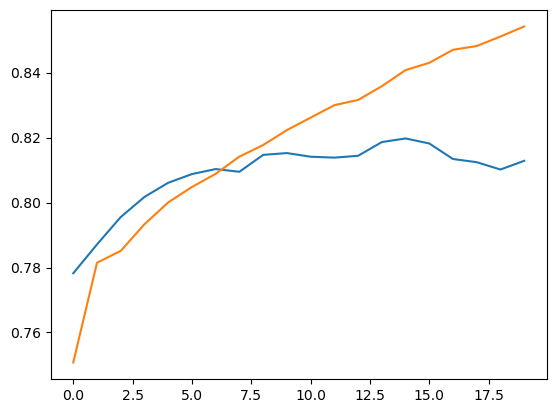

In [163]:

plt.plot(range(len(acc)), val_acc)
plt.plot(range(len(acc)), acc)

In [ ]:
%model.predict()

In [60]:
def nametonum(name: str):
    name=name.lower()
    name_encoded=encod_names(name)
    name_encoded=comp_list(name_encoded)
    return [name_encoded]

In [63]:
encod_names("junior")

[10, 21, 14, 9, 15, 18]

In [192]:
X_test[1, :].reshape(1, 50)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  1, 19,  8,  1, 14,
         1,  5]])

In [93]:
test_pre=model.predict(X_train)

889/889 [==============================] - 41s 46ms/step


In [94]:
test_pre.shape

(28448, 1)

In [81]:
sum(y_te), len(y_test)

(2797, 7113)

In [95]:
y_pred=np.apply_along_axis(lambda x: 1 if x>.3 else 0, 1, test_pre)

In [98]:
y_pred.shape, y_train.shape

((28448,), (28448,))

In [99]:
suy_pred==y_train)/len(y_train)

SyntaxError: unmatched ')' (19033702.py, line 1)

In [86]:
y_pred.astype(int)

array([0, 0, 1, ..., 0, 0, 0])

In [92]:
y_train.shape, y_pred.shape

((28448,), (7113,))

In [118]:
fin=lambda x: 1 if x>.5 else 0

In [89]:
y_pred.shape

(7113,)

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

In [101]:
accuracy_score(y_train, y_pred)

0.8333802024746907

In [124]:
roc_curve(y_test, test_pre)

(array([0.       , 0.       , 0.       , ..., 0.9798331, 0.9798331,
        1.       ]),
 array([0.00000000e+00, 3.57525921e-04, 1.68037183e-02, ...,
        9.99642474e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.9995412e+00, 9.9954116e-01, 9.9442786e-01, ..., 5.6628906e-03,
        5.6275055e-03, 1.3762284e-03], dtype=float32))

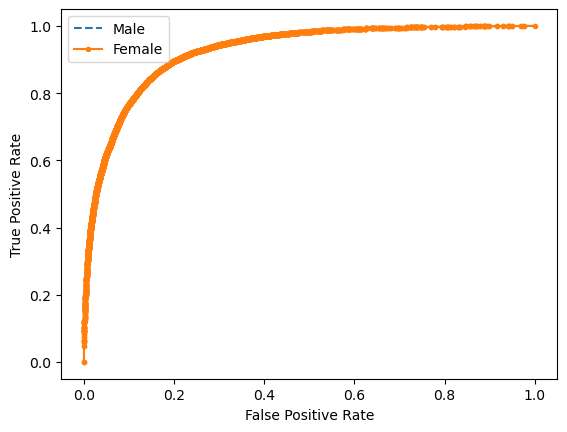

In [103]:
ns_fpr, ns_tpr, _ = roc_curve(y_train, test_pre)
lr_fpr, lr_tpr, _ = roc_curve(y_train, test_pre)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Male')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Female')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [234]:
Junior=np.array(nametonum("aziz"))
p=model.predict(Junior)

1/1 [==============================] - 0s 41ms/step


In [238]:
p[0][0]

0.9013386

In [140]:
X_test

array([[ 0,  0,  0, ...,  3, 17,  0],
       [ 0,  0,  0, ..., 13,  0,  4],
       [ 0,  0,  0, ..., 19,  4, 13],
       ...,
       [ 0,  0,  0, ...,  7,  0, 21],
       [ 0,  0,  0, ..., 14, 12,  0],
       [ 0,  0,  0, ...,  4,  3, 24]])

In [7]:
model=tf.keras.models.load_model("predict_name.h5")

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 256)           6912      
                                                                 
 bidirectional (Bidirectiona  (None, 256)              394240    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 401,409
Trainable params: 401,409
Non-trainable params: 0
_________________________________________________________________


In [39]:
import predict_sex as ps

In [40]:
ps.predict_name("Kadiatou")

1/1 [==============================] - 0s 44ms/step


('Male', array([[0.77328974]], dtype=float32))

SyntaxError: invalid syntax (3108715029.py, line 1)

In [2]:
import predict_sex as ps

the lastest element in alphabet is  this  


In [6]:
ps.predict_name("Jeanne")

1/1 [==============================] - 0s 86ms/step


('Female', array([[0.9833862]], dtype=float32))

In [119]:
data[data.gender==0]

,name,gender,name_encoded
0,mary,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,annie,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,anna,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,margaret,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,helen,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...
35555,fanta,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
35556,fatim,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
35558,fatima,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
35559,fatoumata,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [9]:
Converter=tf.lite.TFLiteConverter.from_keras_model(
model)
tflite_model=Converter.convert()

with open("model.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\7MAKSA~1\AppData\Local\Temp\tmpedplg80b\assets


INFO:tensorflow:Assets written to: C:\Users\7MAKSA~1\AppData\Local\Temp\tmpedplg80b\assets


ConverterError: C:\Users\7MAKSACOD PC\miniconda3\lib\site-packages\tensorflow\python\saved_model\save.py:1325:0: error: 'tf.TensorListReserve' op requires element_shape to be static during TF Lite transformation pass
<unknown>:0: note: loc(fused["StatefulPartitionedCall:", "StatefulPartitionedCall"]): called from
C:\Users\7MAKSACOD PC\miniconda3\lib\site-packages\tensorflow\python\saved_model\save.py:1325:0: error: failed to legalize operation 'tf.TensorListReserve' that was explicitly marked illegal
<unknown>:0: note: loc(fused["StatefulPartitionedCall:", "StatefulPartitionedCall"]): called from
<unknown>:0: error: Lowering tensor list ops is failed. Please consider using Select TF ops and disabling `_experimental_lower_tensor_list_ops` flag in the TFLite converter object. For example, converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]\n converter._experimental_lower_tensor_list_ops = False


In [10]:
model.save("predict.pb")

INFO:tensorflow:Assets written to: predict.pb\assets


INFO:tensorflow:Assets written to: predict.pb\assets


In [16]:
run_model=tf.function(lambda x : model(x))

In [22]:
model.inputs

[<KerasTensor: shape=(None, 50) dtype=float32 (created by layer 'embedding_3_input')>]

In [31]:
BATCH_SIZE=64
STEPS=1
INPUT_SIZE = 50

concrete_func = run_model.get_concrete_function(tf.TensorSpec((None, INPUT_SIZE), model.inputs[0].dtype))

MODEL_DIR = "Predict_sex"
model.save(MODEL_DIR, save_format="tf", signatures=concrete_func)

converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_DIR)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: Predict_sex\assets


INFO:tensorflow:Assets written to: Predict_sex\assets


ConverterError: <unknown>:0: error: loc(callsite(callsite(fused["TensorListReserve:", "sequential_3/bidirectional_3/backward_lstm_3/TensorArrayV2_1@__inference_<lambda>_85952"] at fused["StatefulPartitionedCall:", "StatefulPartitionedCall@__inference_signature_wrapper_133825"]) at fused["StatefulPartitionedCall:", "StatefulPartitionedCall"])): 'tf.TensorListReserve' op requires element_shape to be static during TF Lite transformation pass
<unknown>:0: note: loc(fused["StatefulPartitionedCall:", "StatefulPartitionedCall"]): called from
<unknown>:0: error: loc(callsite(callsite(fused["TensorListReserve:", "sequential_3/bidirectional_3/backward_lstm_3/TensorArrayV2_1@__inference_<lambda>_85952"] at fused["StatefulPartitionedCall:", "StatefulPartitionedCall@__inference_signature_wrapper_133825"]) at fused["StatefulPartitionedCall:", "StatefulPartitionedCall"])): failed to legalize operation 'tf.TensorListReserve' that was explicitly marked illegal
<unknown>:0: note: loc(fused["StatefulPartitionedCall:", "StatefulPartitionedCall"]): called from
<unknown>:0: error: Lowering tensor list ops is failed. Please consider using Select TF ops and disabling `_experimental_lower_tensor_list_ops` flag in the TFLite converter object. For example, converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]\n converter._experimental_lower_tensor_list_ops = False
